# 1. Thuật toán cây quyết định

## Cho bài toán phân loại

In [ ]:
from __future__ import print_function 
import numpy as np 
import pandas as pd 

class TreeNode(object):
    def __init__(self, ids = None, children = [], entropy = 0, depth = 0):
        self.ids = ids           # index of data in this node
        self.entropy = entropy   # entropy, will fill later
        self.depth = depth       # distance to root node
        self.split_attribute = None # which attribute is chosen, it non-leaf
        self.children = children # list of its child nodes
        self.order = None       # order of values of split_attribute in children
        self.label = None       # label of node if it is a leaf

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute
        self.order = order

    def set_label(self, label):
        self.label = label
        

In [ ]:
def entropy(freq):
    # remove prob 0 
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0/float(freq_0.sum())
    return -np.sum(prob_0*np.log(prob_0))

In [ ]:
class DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 1e-4):
        self.root = None
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.Ntrain = 0
        self.min_gain = min_gain
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0]
        self.data = data 
        self.attributes = list(data)
        self.target = target 
        self.labels = target.unique()
        
        ids = range(self.Ntrain)
        self.root = TreeNode(ids = ids, entropy = self._entropy(ids), depth = 0)
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)
                if not node.children: #leaf node
                    self._set_label(node)
                queue += node.children
            else:
                self._set_label(node)
                
    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0
        ids = [i+1 for i in ids] # panda series index starts from 1
        freq = np.array(self.target[ids].value_counts())
        return entropy(freq)

    def _set_label(self, node):
        # find label for a node if it is a leaf
        # simply chose by major voting 
        target_ids = [i + 1 for i in node.ids]  # target is a series variable
        node.set_label(self.target[target_ids].mode()[0]) # most frequent label
    
    def _split(self, node):
        ids = node.ids 
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique().tolist()
            if len(values) == 1: continue # entropy = 0
            splits = []
            for val in values: 
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                splits.append([sub_id-1 for sub_id in sub_ids])
            # don't split if a node has too small number of points
            if min(map(len, splits)) < self.min_samples_split: continue
            # information gain
            HxS= 0
            for split in splits:
                HxS += len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS 
            if gain < self.min_gain: continue # stop if small gain 
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits
                best_attribute = att
                order = values
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids = split,
                     entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]
        return child_nodes

    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.count()[0]
        labels = [None]*npoints
        for n in range(npoints):
            x = new_data.iloc[n, :] # one point 
            # start from root and recursively travel if not meet a leaf 
            node = self.root
            while node.children: 
                node = node.children[node.order.index(x[node.split_attribute])]
            labels[n] = node.label
            
        return labels

In [ ]:
if __name__ == "__main__":
    df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    tree = DecisionTreeID3(max_depth = 2, min_samples_split = 2)
    tree.fit(X, y)
    print(tree.predict(X))

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


In [ ]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('weather.csv', index_col = 0, parse_dates = True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
 ids=range(14)
 ids = [i+1 for i in ids]
 ids
 freq=y[ids].value_counts()
 freq=np.array(freq)

In [ ]:
np.array(freq).nonzero()[0]

array([0, 1])

In [ ]:
freq[[0,1]]==

array([ True,  True])

In [ ]:
freq_0 = freq[np.array(freq).nonzero()[0]]
freq_0

array([9, 5])

In [ ]:
prob_0 = freq_0/float(freq_0.sum())
prob_0

array([0.64285714, 0.35714286])

In [ ]:
-np.sum(prob_0*np.log(prob_0))

0.6517565611726531

In [ ]:
queue=['1','3','aa']
queue.pop()

'aa'

[[-1.  -3. ]
 [ 0.  -2. ]
 [ 1.  -2. ]
 [ 2.   1. ]
 [ 3.   0. ]
 [ 1.5  1.4]
 [ 1.   3. ]
 [ 0.5 -1. ]
 [-1.   2. ]
 [-2.  -1.5]
 [-2.   0. ]
 [-1.5 -1.2]]


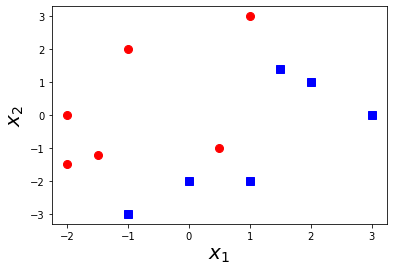

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X = np.c_[(-1, -3),(0, -2),(1, -2),(2, 1),(3, 0),(1.5, 1.4),(1, 3),(0.5, -1),(-1, 2),(-2, -1.5),(-2, 0),(-1.5, -1.2)].T
N = 6
y = [0] * N + [1] * N
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
print(X)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=2022)
tree_clf.fit(X,y)


DecisionTreeClassifier(random_state=2022)

(100, 100)

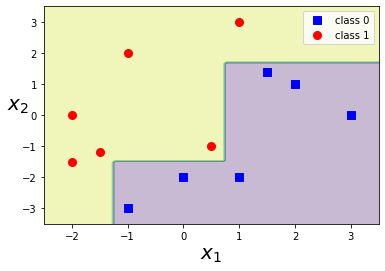

In [ ]:
plt.axis([-2.5,3.5,-3.5,3.5])
x1s = np.linspace(-2.5, 3.5, 100)
x2s = np.linspace(-3.5, 3.5, 100)
#Tạo lưới bao figure x1,x2 dim R^100x100
x1, x2 = np.meshgrid(x1s, x2s)
#ravel để tách mảng thành 1 hàng R^1x10000
#c_ để ghép 2 mảng thành R^10000x2
X_new = np.c_[x1.ravel(), x2.ravel()]
#y_pred mảng 1 chiều chuyển về dạng R^100x100 để vẽ countour
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8,label='class 0')
plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8,label='class 1')
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20,rotation=0)
plt.legend()
y_pred.shape

# 2. Cây quyết định hồi quy

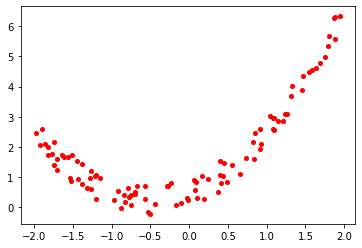

In [ ]:
np.random.seed(42)
X=4*np.random.rand(100,1)-2
y=X**2+X+np.random.rand(100,1)
plt.plot(X,y,'ro',markersize=4)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3)

Text(0, 0.5, 'y')

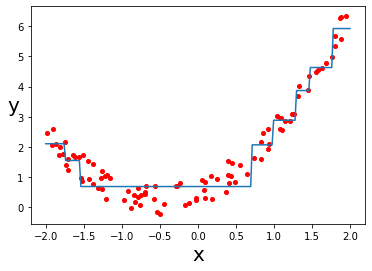

In [ ]:
x1 = np.linspace(-2, 2, 200).reshape(-1, 1)
y_pred = tree_reg.predict(x1)
plt.plot(X,y,'ro',markersize=4)
plt.plot(x1, y_pred)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20,rotation=0)